In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()

In [176]:
df = pd.read_csv('../datasets/new_EURUSD/EURUSD_M1.csv', sep='\t')
# rename "Time" to "Timestamp"
df = df.rename(columns={'Time': 'Timestamp'})
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [177]:
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time
df['WeekDay'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

df['Minute'] = df['Timestamp'].dt.minute

In [178]:
df['ret'] = np.log(df['Close']).diff()
df = df.dropna()

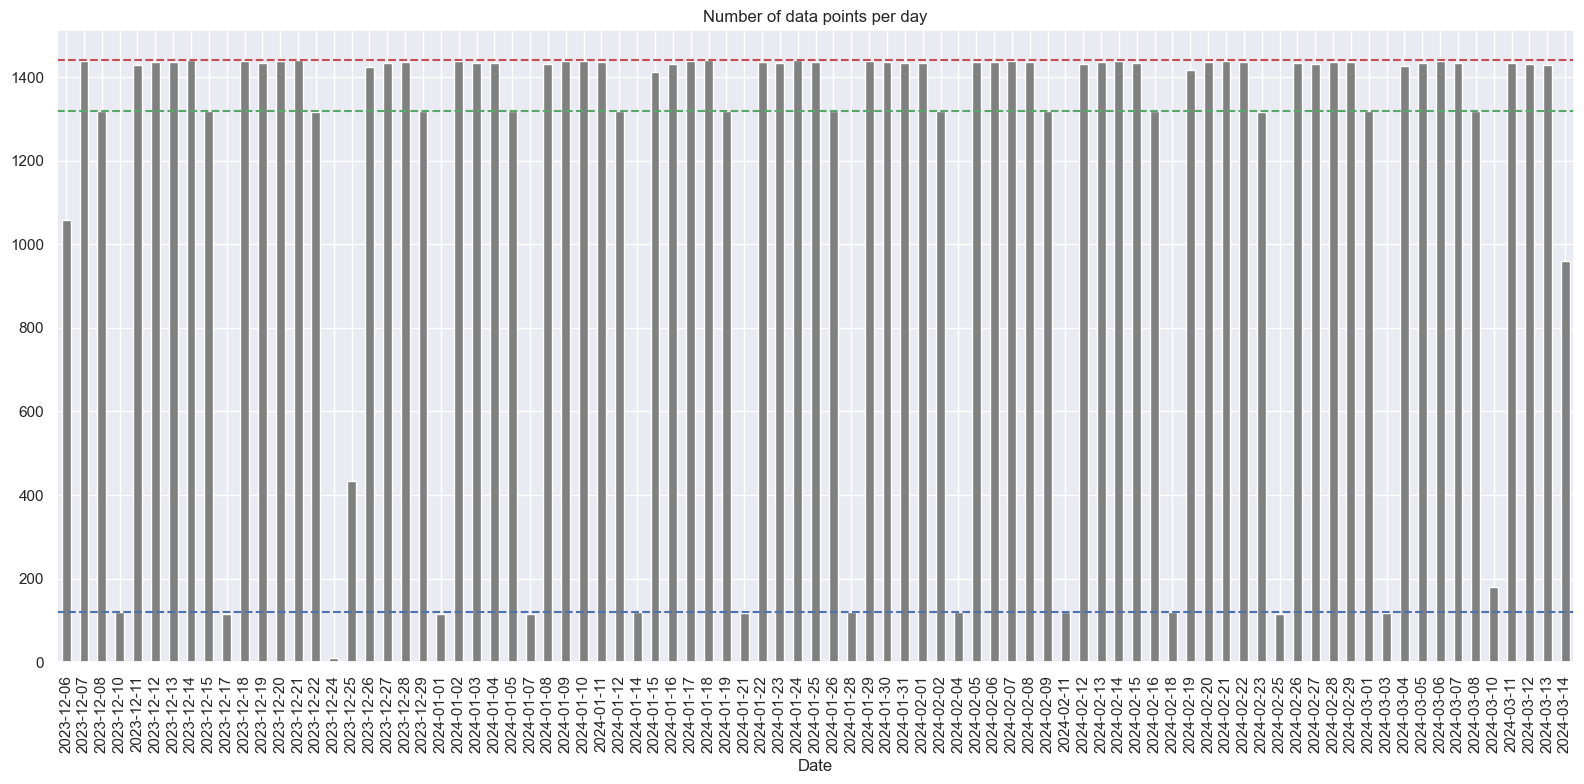

In [179]:
plt.figure(figsize=(16, 8))
df.groupby('Date').size().plot(kind='bar', color='grey')
plt.axhline(y=24*60, color='r', linestyle='--')
plt.axhline(y=22*60, color='g', linestyle='--')
plt.axhline(y=2*60, color='b', linestyle='--')
# plt.xticks([])
plt.title('Number of data points per day')
plt.tight_layout()
plt.show()

Les vendredis on a seulement 00h-22h for some reason...
Les dimanches on a seulement 22h-24h for some reason...

--> logique: on a une timezone qui fait que le marché ferme vendredi à 22h et réouvre dimanche à 22h! (ce qui fait bien 48h de pause!)

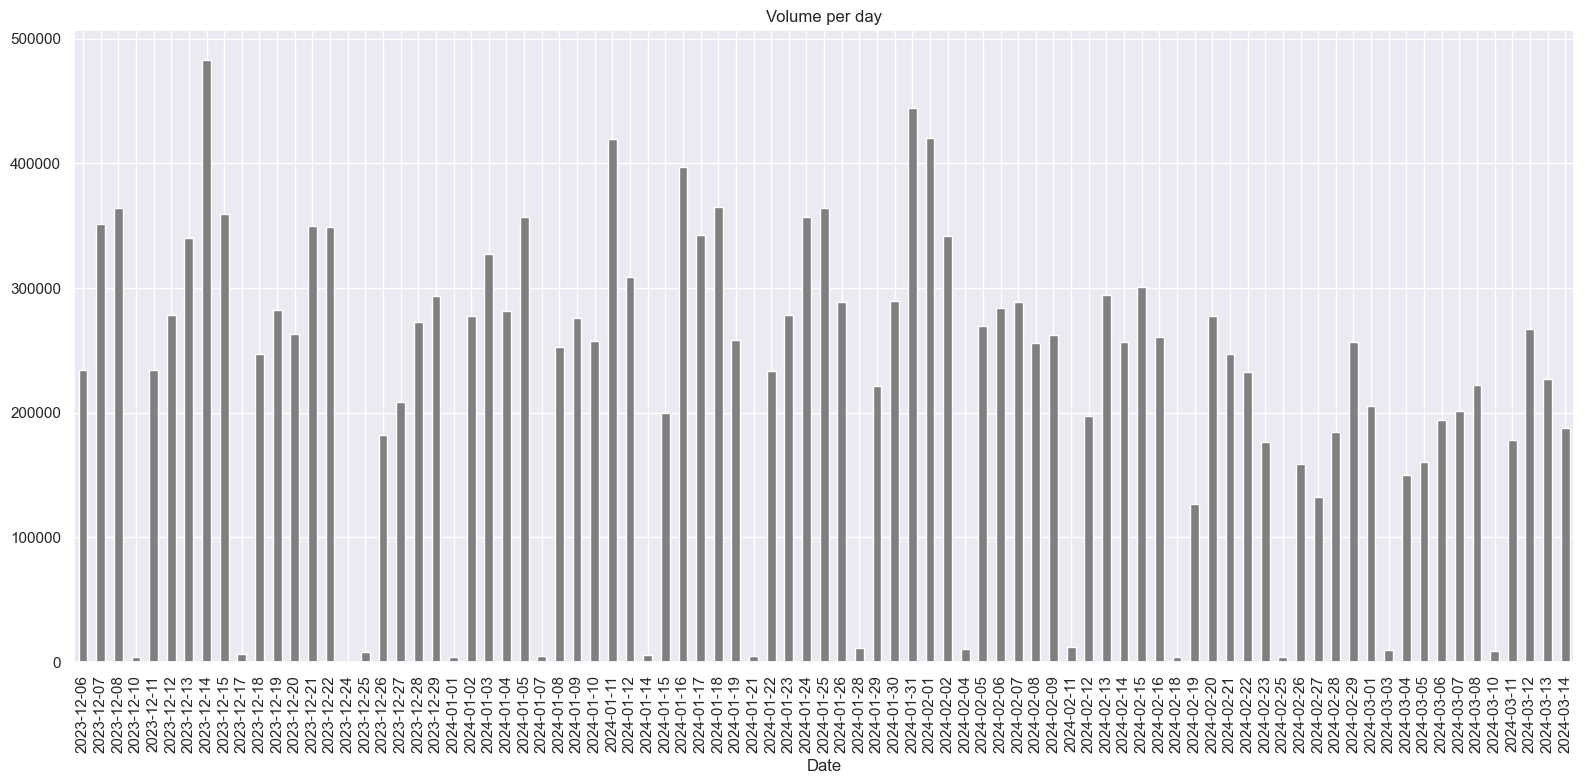

In [180]:
plt.figure(figsize=(16, 8))
df.groupby('Date')['Volume'].sum().plot(kind='bar', color='grey')
plt.title('Volume per day')
plt.tight_layout()
plt.show()

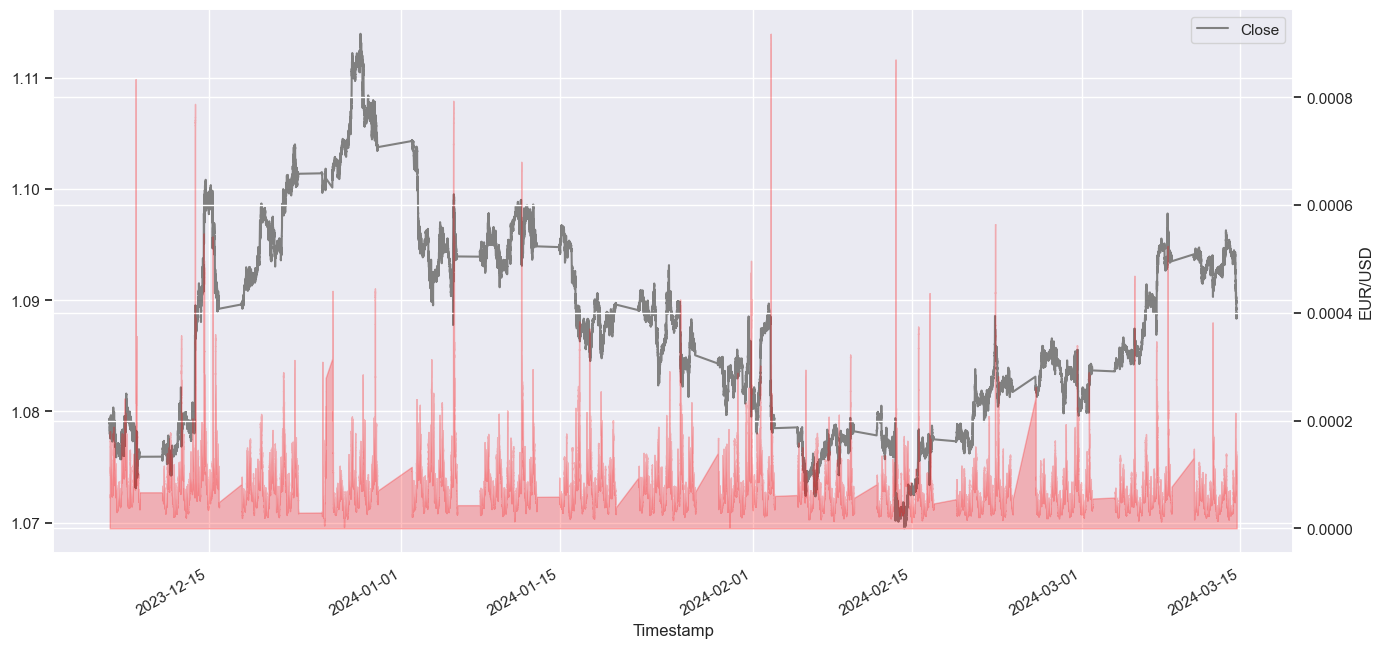

In [181]:
df.plot(x='Timestamp', y='Close', figsize=(16, 8), color='grey')
volatility = df['ret'].rolling(30).std()
plt.twinx()
plt.fill_between(df['Timestamp'], 0, volatility, color='red', alpha=0.25)

plt.ylabel('EUR/USD')
plt.show()

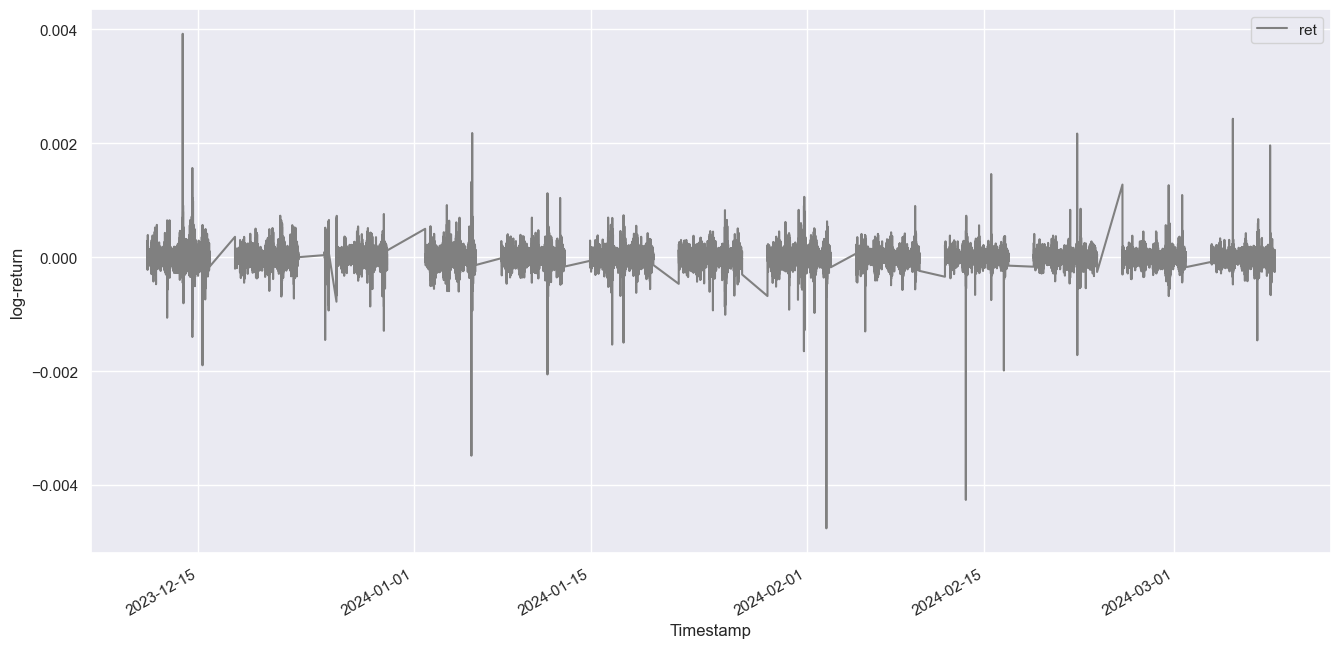

In [133]:
df.plot(x='Timestamp', y='ret', figsize=(16, 8), color='grey')
plt.ylabel('log-return')
plt.show()

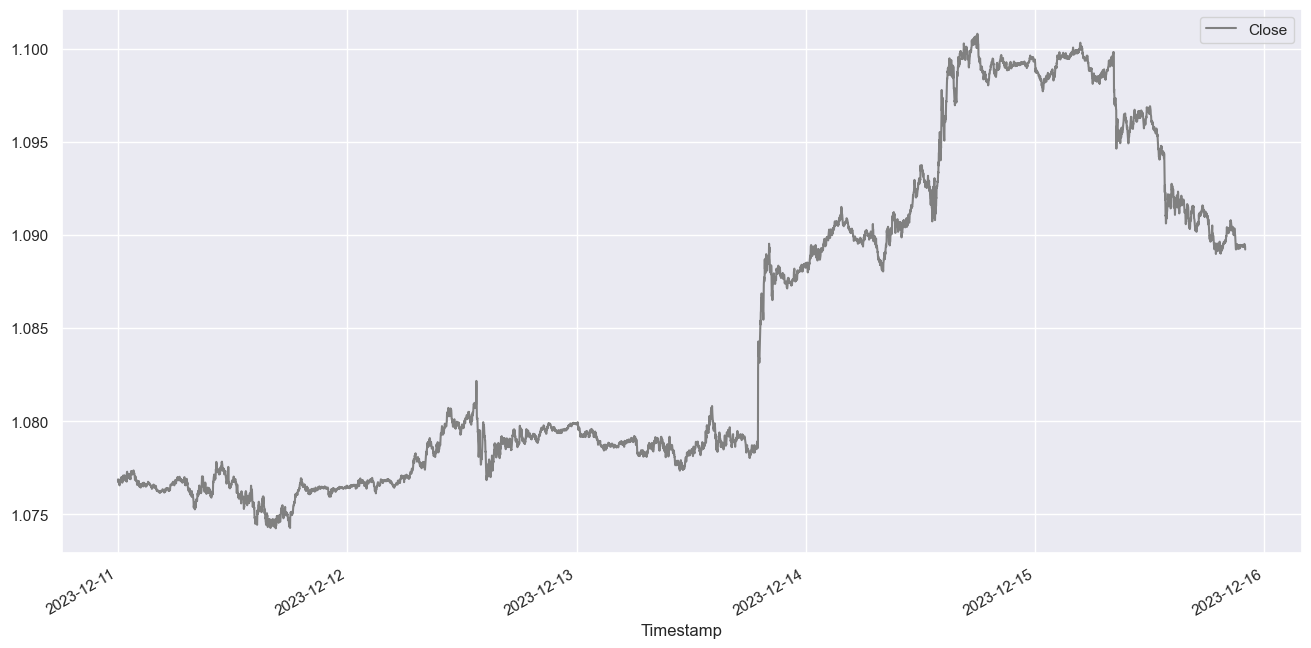

In [165]:
first_monday = pd.to_datetime('2023-12-11') 
first_saturday = pd.to_datetime('2023-12-16')

first_session = df[(df['Timestamp'] >= first_monday) & (df['Timestamp'] <= first_saturday)]

first_session.plot(x='Timestamp', y='Close', figsize=(16, 8), color='grey')
plt.show()

In [202]:
sundays = df[df['WeekDay'] == 6]['Date'].unique()
# drop last sunday because we don't have the full week of data
sundays = sundays[:-1]

sessions = []

for i in range(len(sundays)):
    sunday = sundays[i]
    session = df[(df['Date'] >= sunday) & (df['Date'] <= sunday + pd.Timedelta(days=6))]
    sessions.append(session)

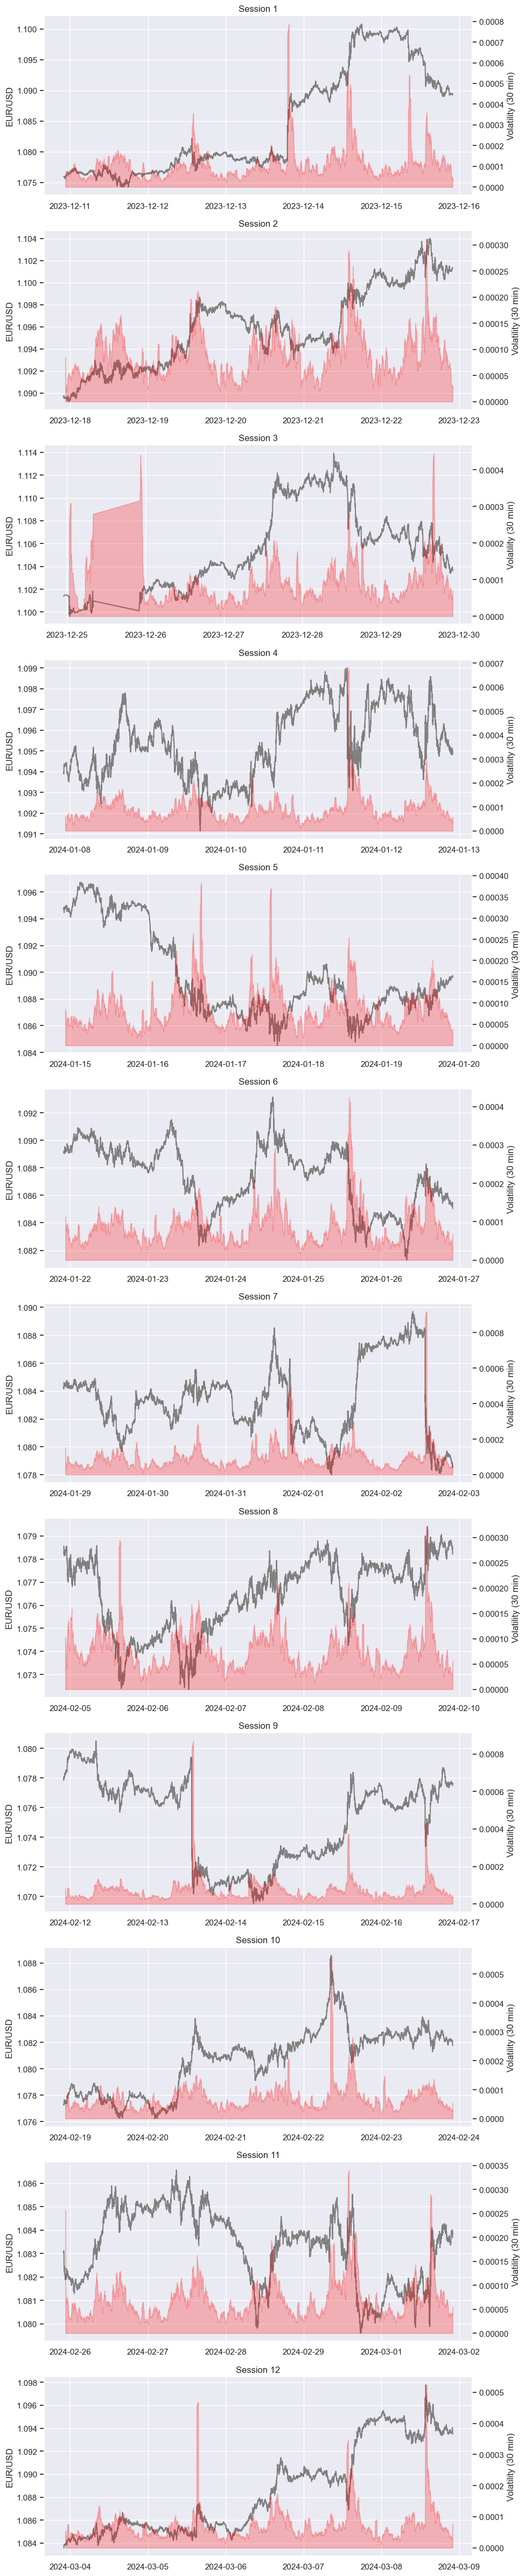

In [216]:
n_sessions = len(sessions)
window_size = 30

fig, axs = plt.subplots(n_sessions, 1, figsize=(10, 4*n_sessions))

for i in range(n_sessions):
    session = sessions[i]
    ax = axs[i]
    ax.plot(session['Timestamp'], session['Close'], color='grey')
    ax.set_ylabel('EUR/USD')

    volatility = session['ret'].rolling(window_size).std()
    ax = ax.twinx()
    ax.grid(False)
    ax.fill_between(session['Timestamp'], 0, volatility, color='red', alpha=0.25)
    ax.set_ylabel(f'Volatility ({window_size} min)')

    ax.set_title(f'Session {i+1}')
    

plt.tight_layout()
plt.show()

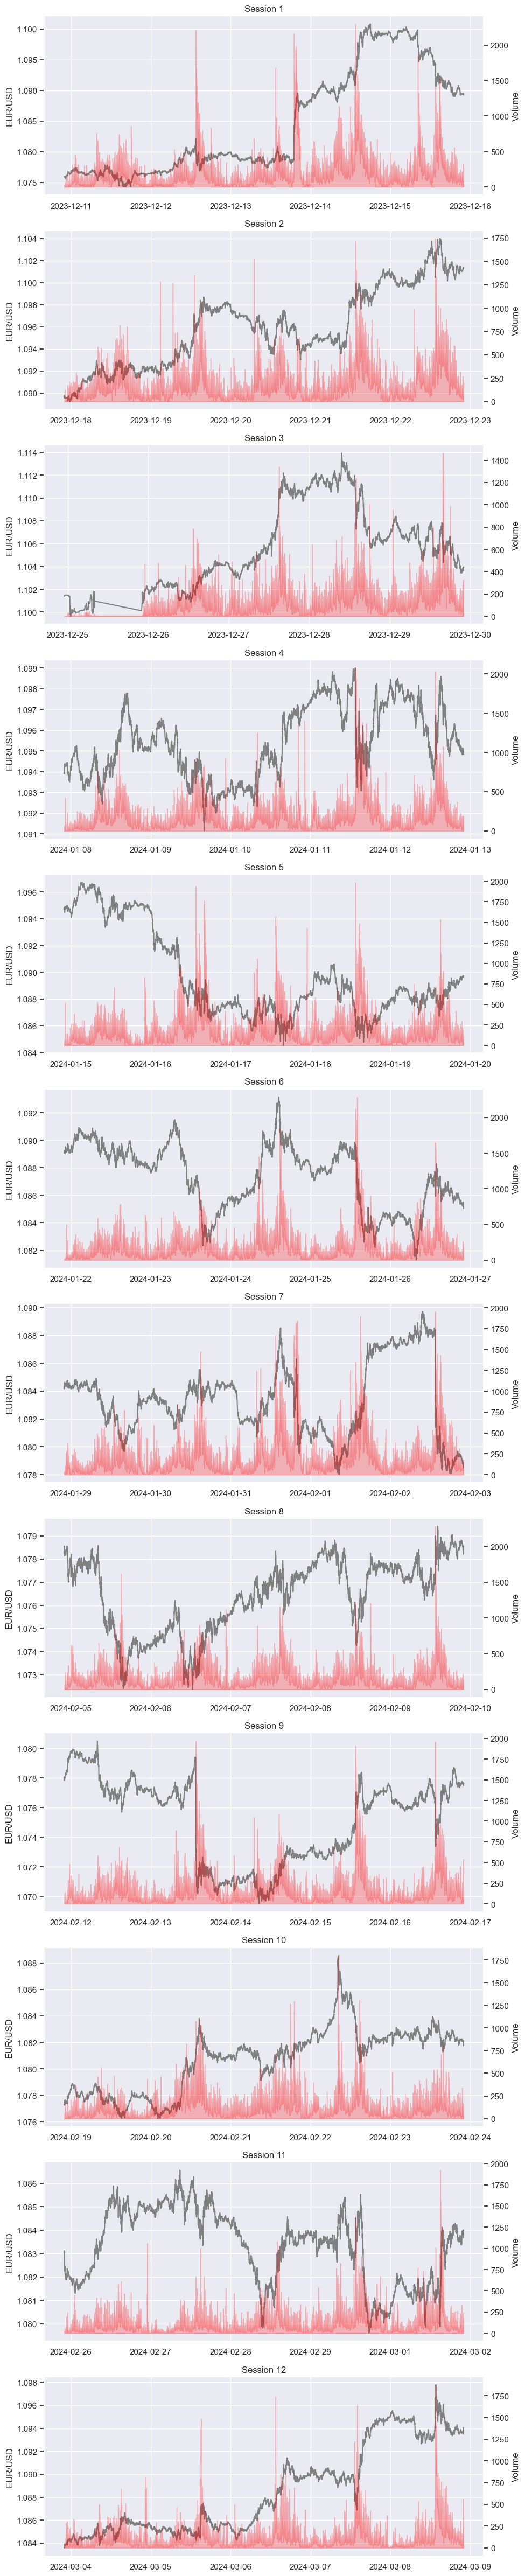

In [215]:
n_sessions = len(sessions)
window_size = 30

fig, axs = plt.subplots(n_sessions, 1, figsize=(10, 4*n_sessions))

for i in range(n_sessions):
    session = sessions[i]
    ax = axs[i]
    ax.plot(session['Timestamp'], session['Close'], color='grey')
    ax.set_ylabel('EUR/USD')

    ax = ax.twinx()
    ax.grid(False)
    ax.fill_between(session['Timestamp'], 0, session['Volume'], color='red', alpha=0.25)
    ax.set_ylabel(f'Volume')

    ax.set_title(f'Session {i+1}')
    

plt.tight_layout()
plt.show()

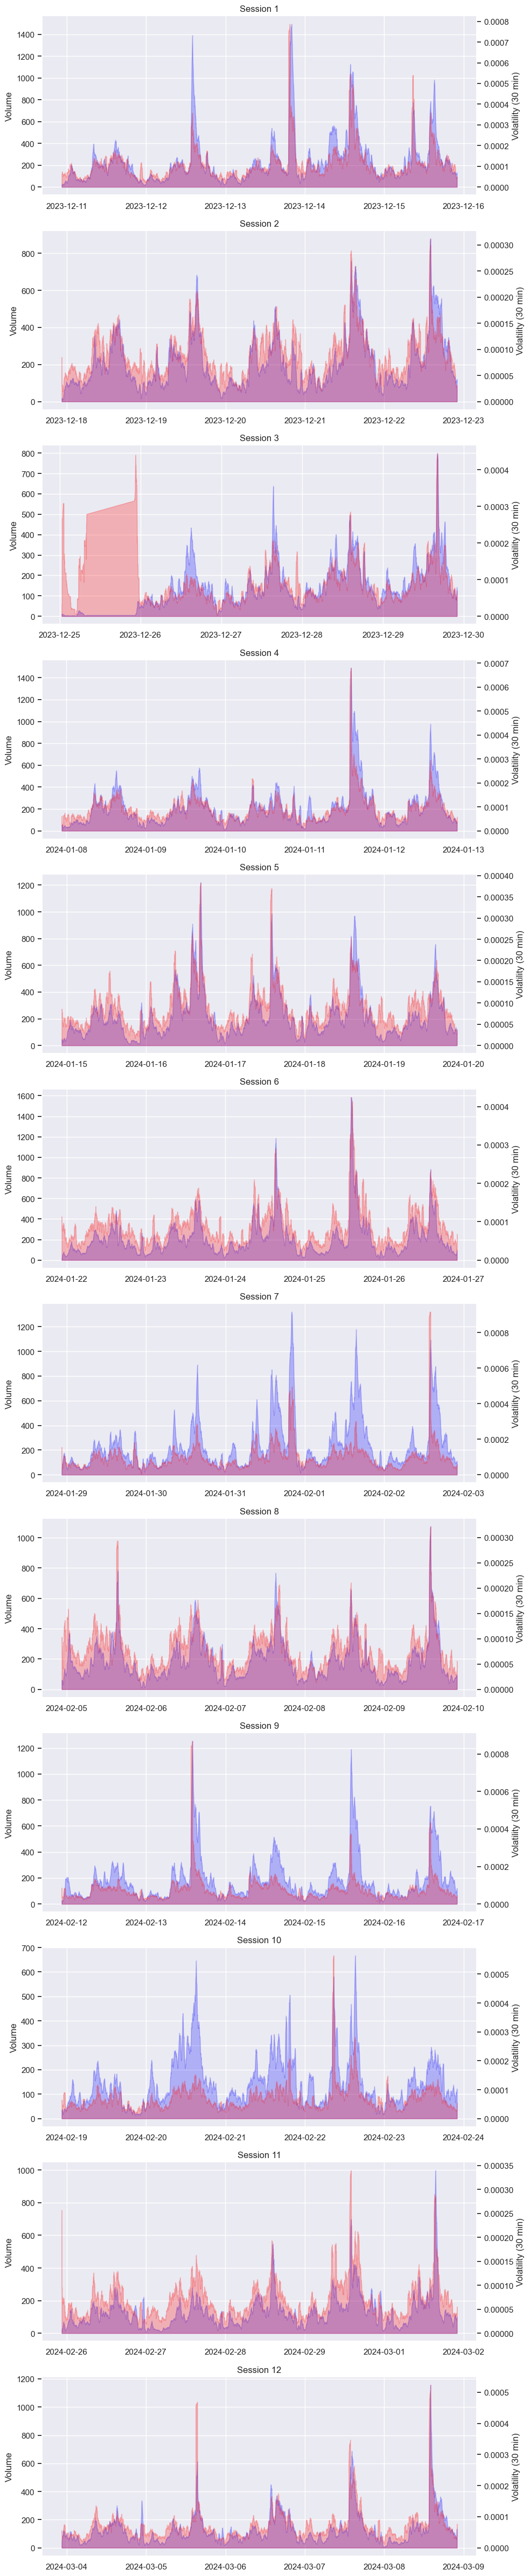

In [220]:
n_sessions = len(sessions)
window_size = 30

fig, axs = plt.subplots(n_sessions, 1, figsize=(10, 4*n_sessions))

for i in range(n_sessions):
    session = sessions[i]
    ax = axs[i]
    rolling_volume = session['Volume'].rolling(window_size).mean()
    # ax.plot(session['Timestamp'], session['Volume'], color='blue', alpha=0.25)
    ax.fill_between(session['Timestamp'], 0, rolling_volume, color='blue', alpha=0.25)
    ax.set_ylabel('Volume')

    volatility = session['ret'].rolling(window_size).std()
    ax = ax.twinx()
    ax.grid(False)
    ax.fill_between(session['Timestamp'], 0, volatility, color='red', alpha=0.25)
    ax.set_ylabel(f'Volatility ({window_size} min)')

    ax.set_title(f'Session {i+1}')
    

plt.tight_layout()
plt.show()